In [2]:
from scipy import integrate
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 5, 5

In [3]:
col_names=['name', 'WEBDA', 'vsini', 'vsini_error', 'Vr1', 'Vr2', 'Vr3', 'SpType', 'Notes']
#~ 1-  7 A7     ---     Name    Cluster name
   #~ 9- 13 I5     ---     WEBDA   Webda ID (http://obswww.unige.ch/web) (1)
  #~ 15- 17 I3     km/s    vsini   Derived projected rotational velocity 
  #~ 19- 20 I2     km/s  e_vsini   Measurement error in vsini 
  #~ 22- 27 F6.1   km/s    Vr(N1)  Radial velocity from first night (2)
  #~ 29- 34 F6.1   km/s    Vr(N2)  ? Radial velocity from second night if available
                                 #~ (2)
  #~ 36- 41 F6.1   km/s    Vr(N3)  ? Radial velocity from third night if available
                                 #~ (2)
  #~ 43- 46 F4.1   ---     SpType  Index of estimated pseudo-spectral type (3)
  #~ 48-142 A95    ---     Notes   Additional notes 

df=pd.read_csv('./Huang2006_rotdist (copy).dat', comment='#', delim_whitespace= True,
                names=col_names)

df.head()

,name,WEBDA,vsini,vsini_error,Vr1,Vr2,Vr3,SpType,Notes
0,Ber86,1,184,7,30.3,30.8,1.3,NaN,NaN
1,Ber86,3,192,10,-24.6,7.5,4.0,SB2,NaN
2,Ber86,4,178,8,17.2,45.2,1.0,SB2,NaN
3,Ber86,9,362,21,-7.6,-15.7,3.3,NaN,NaN
4,Ber86,12,309,11,-6.8,8.0,10.0,NaN,NaN


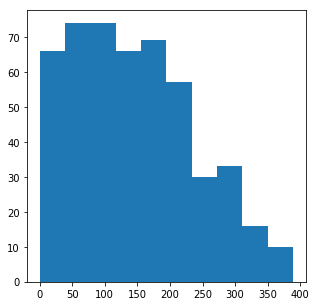

In [4]:
plt.hist(df['vsini'])
plt.show()

max vsini =  389
   index     name  WEBDA  vsini  vsini_error   Vr1   Vr2       Vr3 SpType  \
0    470     TR16     15      0           15 -14.4   2.3  emission     in   
1     73   IC2944     33      0           18 -17.3  -6.0     -10.9    2.0   
2     85   IC2944     98      1           39 -12.8  -3.8     -10.8    2.0   
3    339  NGC2422     71      3           12  29.4  34.0      13.0    NaN   
4    282  NGC2244   1034      3           12  78.2  15.3      87.8   14.0   

     Notes  unit  
0  H-gamma   1.0  
1      NaN   1.0  
2      NaN   1.0  
3      NaN   1.0  
4      SB1   1.0  


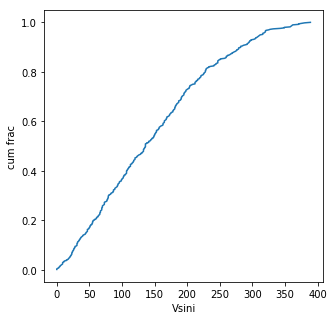

In [5]:
df=df.sort_values('vsini') # sort data by vsini 

df=df.reset_index() # reset indexes 
df['unit'] =np.ones(len(df)) # create col consisting of always 1 to perform cumulative sum over 

print "max vsini = ", df['vsini'].max()
print df.head()

#do cum sum and normalize 
q= df['unit'].cumsum()
q=q/q.max()

#plot
plt.plot(df['vsini'], q, '-')
plt.ylabel('cum frac')
plt.xlabel('Vsini')
plt.show()

# perform fit on cum distribution # 

389
fitted polynomial coefficients ; 
[ 4.13178821e-11 -4.39024589e-08  9.26042991e-06  3.18155835e-03
 -4.25596312e-03]


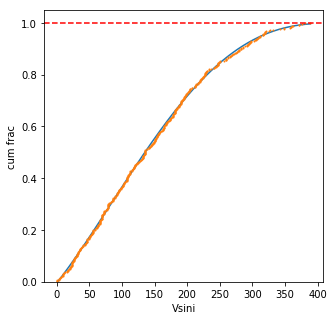

In [6]:
#4th order polynomial fit to cum data
p4=np.poly1d(np.polyfit(df['vsini'], q, 4))

print df['vsini'].max()

x_vals=np.linspace(0,df['vsini'].max(),1200)

print "fitted polynomial coefficients ; \n" , p4.c

plt.plot(x_vals, p4(x_vals))
plt.plot(df['vsini'], q, '.', markersize=2)
plt.axhline(1, color='r', linestyle='--')


plt.ylim(0,1.05)
plt.ylabel('cum frac')
plt.xlabel('Vsini')
plt.show()

# perform differentiation to get PDF #


{0: 0.0031815583489201928, 1: 1.8520859819835348e-05, 2: -1.3170737656592655e-07, 3: 1.6527152827300141e-10}


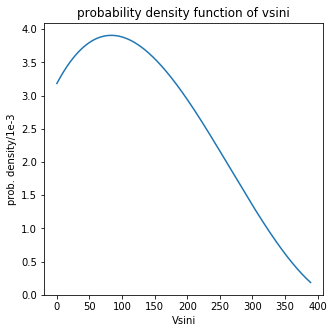

           3             2
1.653e-10 x - 1.317e-07 x + 1.852e-05 x + 0.003182
{0: 0.0031815583489201928, 1: 1.8520859819835348e-05, 2: -1.3170737656592655e-07, 3: 1.6527152827300141e-10}


In [9]:
#differentiate 4th order polynomial
polyn={} # dict with key being order of term, and key being multplicative coefficient
for c, n in zip(p4.c, reversed(range(1,5))):
    diffd= c*n 
    polyn[n-1]= diffd 
        
print polyn


# make numpy polynomial object
Pdf_vsini= np.poly1d([polyn[3], polyn[2], polyn[1], polyn[0]])

#plot pdf 
plt.plot(x_vals, Pdf_vsini(x_vals)/1e-3)

plt.title("probability density function of vsini")
plt.ylabel('prob. density/1e-3')
plt.xlabel('Vsini')
plt.show()

print Pdf_vsini
print polyn

# deconvolve vsini distribution to get v distribution #

In [7]:
from scipy.signal import convolve2d as conv2

from skimage import color, data, restoration

<type 'numpy.ndarray'>
[0.90909  0.919191 0.929292 0.939393 0.949494 0.959595 0.969696 0.979797
 0.989898 0.999999]


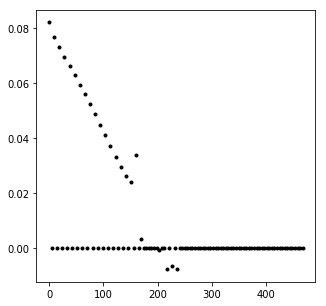

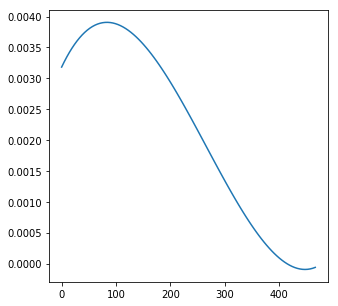

In [58]:
psf_x = np.ones((5, 5)) / 25
#astro = conv2(astro, psf, 'same')
# Add Noise to Image
#astro_noisy = astro.copy()
#astro_noisy += (np.random.poisson(lam=25, size=astro.shape) - 10) / 255.
 


#astro_1d = astro[:1, :]
psf_1d = psf_x[:1, :] * 5

print type(psf_1d)
#print np.array([psf])

x_vals=np.linspace(0,1.2*df['vsini'].max(),100)


# assume randomly distributed inclinations, so sini pdf given by p_y. see http://ece-research.unm.edu/bsanthan/ece340/transrv.pdf
y_vals= np.linspace(0,0.999999,100)
print y_vals[90:]
p_y= lambda x: 1/(np.pi * np.sqrt(1-x**2))

psf=p_y(y_vals)

deconvolved = restoration.richardson_lucy(np.array([Pdf_vsini(x_vals)]),np.array([psf]), iterations=int(1e6))


#print deconvolved[0]
plt.plot( x_vals,deconvolved[0], 'k.')
plt.show()
plt.plot(x_vals, Pdf_vsini(x_vals))

/home/ben/.local/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in divide
  app.launch_new_instance()


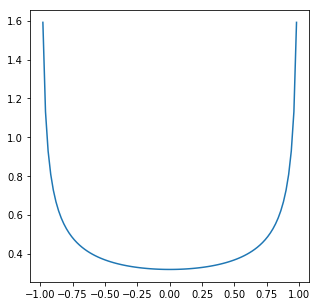

In [28]:
y_vals= np.linspace(-1,1,100)

p_y= lambda x: 1/(np.pi * np.sqrt(1-x**2))

plt.plot(y_vals, p_y(y_vals))

# TESTINGS #

In [184]:

def F(x):
    def integrand(x,y):
        
        
        return (x/np.sqrt(y**2 - x**2) + np.arccos(x/y))*Pdf_vsini(y)
        
        
    i=integrate.quad( integrand, x, np.inf, args=(x,))
    return i
#integrate.quad_explain()


print F(1)

(nan, nan)


In [205]:
#plt.plot(x_vals, integrand(3, x_vals))


def integrand(x,y):


    return (x*y**(-2))



def F(x):
    print "integrating from ", x, "to inf"
        
        
    i=integrate.quad( integrand, 3, np.inf, args=(3,))
    return i
#integrate.quad_explain()


print F(3)

integrating from  3 to inf
(-0.2777777782020772, 1.7346175607002579e-09)


4.0

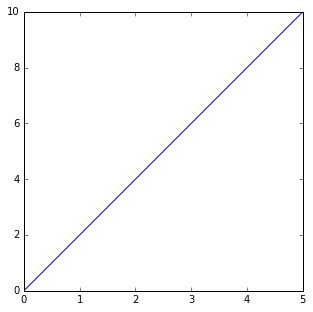

In [212]:
w=2
z=np.linspace(0,5,10)
plt.plot(z, f(w,z))

f = lambda x,a : a*x
y, err = integrate.quad(f, 0, 2, args=(w,))
y

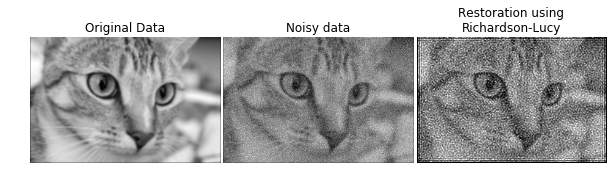

In [80]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import convolve2d as conv2

from skimage import color, data, restoration


astro = color.rgb2gray(data.chelsea())

psf = np.ones((5, 5)) / 100
astro = conv2(astro, psf, 'same')
# Add Noise to Image
astro_noisy = astro.copy()
astro_noisy += (np.random.poisson(lam=25, size=astro.shape) - 10) / 255.

# Restore Image using Richardson-Lucy algorithm
deconvolved_RL = restoration.richardson_lucy(astro_noisy, psf, iterations=30)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 5))
plt.gray()

for a in (ax[0], ax[1], ax[2]):
       a.axis('off')

ax[0].imshow(astro)
ax[0].set_title('Original Data')

ax[1].imshow(astro_noisy)
ax[1].set_title('Noisy data')

ax[2].imshow(deconvolved_RL, vmin=astro_noisy.min(), vmax=astro_noisy.max())
ax[2].set_title('Restoration using\nRichardson-Lucy')


fig.subplots_adjust(wspace=0.02, hspace=0.2,
                    top=0.9, bottom=0.05, left=0, right=1)
plt.show()

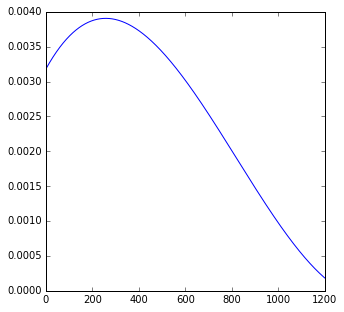

In [89]:
plt.plot(Pdf_vsini(x_vals))

0.0130329074485


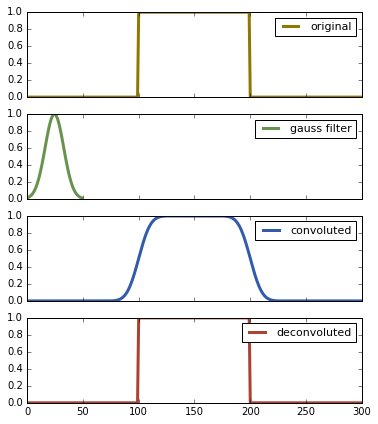

In [142]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

# let the signal be box-like
signal = np.repeat([0., 1., 0.], 100)
# and use a gaussian filter
# the filter should be shorter than the signal
# the filter should be such that it's much bigger then zero everywhere
gauss = np.exp(-( (np.linspace(0,50)-25.)/float(12))**2 )
print gauss.min()  # = 0.013 >> 0

# calculate the convolution (np.convolve and scipy.signal.convolve identical)
# the keywordargument mode="same" ensures that the convolution spans the same
#   shape as the input array.
filtered = scipy.signal.convolve(signal, gauss, mode='same') 
filtered =  np.convolve(signal, gauss, mode='same') 


deconv,  _ = scipy.signal.deconvolve( filtered, gauss )
#the deconvolution has n = len(signal) - len(gauss) + 1 points
n = len(signal)-len(gauss)+1
# so we need to expand it by 
s = (len(signal)-n)/2
#on both sides.
deconv_res = np.zeros(len(signal))
deconv_res[s:len(signal)-s-1] = deconv
deconv = deconv_res
# now deconv contains the deconvolution 
# expanded to the original shape (filled with zeros) 


#### Plot #### 
fig , ax = plt.subplots(nrows=4, figsize=(6,7))

ax[0].plot(signal,            color="#907700", label="original",     lw=3 ) 
ax[1].plot(gauss,          color="#68934e", label="gauss filter", lw=3 )
# we need to divide by the sum of the filter window to get the convolution normalized to 1
ax[2].plot(filtered/np.sum(gauss), color="#325cab", label="convoluted" ,  lw=3 )
ax[3].plot(deconv,         color="#ab4232", label="deconvoluted", lw=3 ) 

for i in range(len(ax)):
    ax[i].set_xlim([0, len(signal)])
    ax[i].set_ylim([0, max(signal)])
    ax[i].legend(loc=1, fontsize=11)
    if i != len(ax)-1 :
        ax[i].set_xticklabels([])

#plt.savefig(__file__ + ".png")
plt.show()    

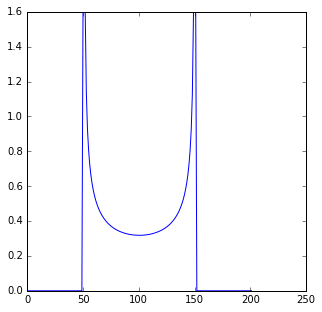

In [166]:


tail= np.append(np.zeros(50), filt[np.isfinite(filt)].max())
tail0= np.append( filt[np.isfinite(filt)].max() ,np.zeros(50))


kernel = np.concatenate((tail , filt), axis=0)
kernel = np.concatenate((kernel, tail0), axis=0)

plt.plot(kernel, label='sini')
plt.show()

<type 'numpy.ndarray'> <type 'numpy.ndarray'>


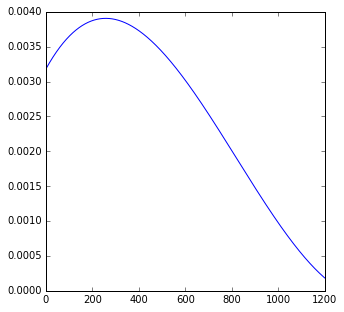

[ 1.  1.  1.  2.  3.  4.]
[        inf  1.59163063  1.13123924  0.9284512   0.80828315  0.72678574
  0.66701903  0.62088675  0.58396879  0.55362133  0.5281537   0.50642793
  0.48764646  0.47123162  0.45675346  0.44388458  0.43237073  0.42201116
  0.41264498  0.40414158  0.39639374  0.38931253  0.38282353  0.37686396
  0.37138048  0.36632745  0.36166562  0.35736103  0.35338421  0.3497094
  0.34631408  0.34317846  0.3402851   0.33761862  0.33516541  0.33291343
  0.33085203  0.32897176  0.32726428  0.32572223  0.32433911  0.32310926
  0.32202772  0.32109023  0.32029314  0.31963343  0.31910858  0.31871663
  0.31845613  0.31832613  0.31832613  0.31845613  0.31871663  0.31910858
  0.31963343  0.32029314  0.32109023  0.32202772  0.32310926  0.32433911
  0.32572223  0.32726428  0.32897176  0.33085203  0.33291343  0.33516541
  0.33761862  0.3402851   0.34317846  0.34631408  0.3497094   0.35338421
  0.35736103  0.36166562  0.36632745  0.37138048  0.37686396  0.38282353
  0.38931253  0.39639374  

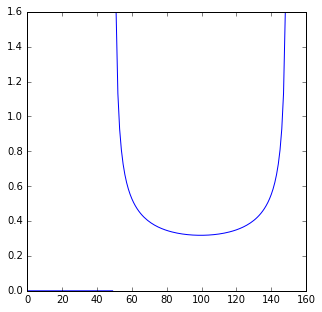

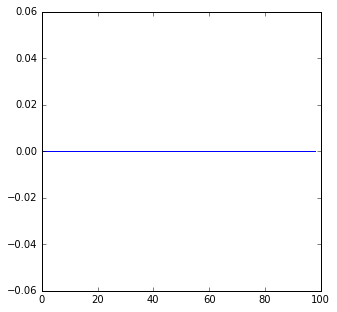

nan


In [160]:

filtered =  Pdf_vsini(x_vals) #np.convolve(signal, gauss, mode='same') 

#define sini distribution
y_vals= np.linspace(-1,1,100)
p_y= lambda x: 1/(np.pi * np.sqrt(1-x**2))
filt= p_y(y_vals)

deconv,  remainder = scipy.signal.deconvolve( filtered, filt )
#the deconvolution has n = len(signal) - len(gauss) + 1 points
n = len(signal)-len(filt)+1
# so we need to expand it by 
s = (len(signal)-n)/2
#on both sides.
deconv_res = np.zeros(len(signal))
#deconv_res[s:len(signal)-s-1] = deconv
#deconv = deconv_res
# now deconv contains the deconvolution 
# expanded to the original shape (filled with zeros) 


print type(filtered), type(filt)
#plt.savefig(__file__ + ".png")
plt.show()    

plt.plot(filtered, label='vsini')
plt.show()




print np.concatenate((np.ones(3), [2,3,4]), axis=0)


tail= np.append(np.zeros(50), np.inf)
print filt
kernel = np.concatenate(( np.zeros(50) , filt), axis=0)
plt.plot(kernel, label='sini')
plt.show()


deconvd, remainder=  scipy.signal.deconvolve( filtered, filt )
plt.plot(deconvd, label='V')
plt.show()


print deconvd.min()

In [131]:
from scipy import integrate
x2 = lambda x: x**2

def int_func( v,  Pdf_vsini, vsini):
    """v= velocity of star
        vsini= vsini of star 
        Pdf_vsini = PDF of vsini """
    #vsini= np.linspace(0,df['vsini'].max(),1200)
    a=v* Pdf_vsini(vsini)/(vsini**2 * np.sqrt(vsini**2-v**2))
    return a 

v=300
print int_func(300, Pdf_vsini, 200)
print v*Pdf_vsini(200)


v=0

#print integrate.quad(int_func , v, np.inf, args=(  v, Pdf_vsini, ))

print(4**3 / 3.)  # analytical result


nan
0.88188224293
21.3333333333
